# SPOTIFY DATA ANALYSIS
### Gourav Panchal  
Mentor: Rajsrhi Thete

## Objectives

1. **Analyze** the distribution of tracks based on genre, artist, release year, and popularity to understand trends in the music industry.

2. **Evaluate** the performance of tracks (e.g., total streams, likes, and chart rankings) across different platforms (e.g., Spotify, Apple Music) to identify patterns in listener preferences.

3. **Examine** track attributes such as tempo (BPM), musical key, mode, and duration to understand their impact on a track's popularity and success in streaming.

4. **Assess** the influence of artists, albums, and collaborations on track performance over time, analyzing how external factors (e.g., promotions, events) correlate with streaming spikes and chart performance.

5. **Investigate** the quality of the dataset by checking for missing or inconsistent data (e.g., incomplete metadata, missing track information) to ensure the accuracy of the analysis.


In [30]:
import mysql.connector
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
connection=mysql.connector.connect(
    user='root',
    password='1234',
    host='localhost',
    database='spotify'
)

In [13]:
cursor=connection.cursor()

# Exploratory Data Analysis

In [14]:
cursor.execute('select * from  tracks')
track_id=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [20]:
# Query to retrieve all tracks data
cursor.execute('select * from tracks')
track_name = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Now you can proceed with the visualizations


In [22]:
# Query to retrieve all tracks data
cursor.execute('select * from tracks')
in_spotify_charts = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Now you can proceed with the visualizations


In [15]:
cursor.execute('select * from  chartrankings')
ranking_id=pd.DataFrame(cursor.fetchall(),columns=[desc[0] for desc in cursor.description])

In [16]:
print(track_id.head())

   track_id                           track_name        artist_name  \
0         1  Seven (feat. Latto) (Explicit Ver.)   Latto, Jung Kook   
1         3                              vampire     Olivia Rodrigo   
2         4                         Cruel Summer       Taylor Swift   
3         5                       WHERE SHE GOES          Bad Bunny   
4         6                             Sprinter  Dave, Central Cee   

   artist_count  released_year  released_month  released_day    streams  bpm  \
0             2           2023               7            14  141381703  125   
1             1           2023               6            30  140003974  138   
2             1           2019               8            23  800840817  170   
3             1           2023               5            18  303236322  144   
4             2           2023               6             1  183706234  141   

  musical_key musical_mode  
0           B        Major  
1           F        Major  
2    

In [17]:
print(ranking_id.head())

   ranking_id  track_id  in_spotify_charts  in_apple_charts  in_deezer_charts  \
0           1       101                147              263                10   
1           2       102                104              208                10   
2           3       103                113              207                14   
3           4       104                100              207                12   
4           5       105                 50              133                15   

   in_shazam_charts  
0               826  
1               425  
2               949  
3               548  
4               425  


In [21]:
print(track_name.columns)

Index(['track_id', 'track_name', 'artist_name', 'artist_count',
       'released_year', 'released_month', 'released_day', 'streams', 'bpm',
       'musical_key', 'musical_mode'],
      dtype='object')


In [23]:
print(in_spotify_charts.columns)

Index(['track_id', 'track_name', 'artist_name', 'artist_count',
       'released_year', 'released_month', 'released_day', 'streams', 'bpm',
       'musical_key', 'musical_mode'],
      dtype='object')


In [24]:
query = """
SELECT 
    t.track_id, 
    t.track_name, 
    t.artist_name, 
    t.artist_count, 
    t.released_year, 
    t.released_month, 
    t.released_day, 
    t.streams, 
    t.bpm, 
    t.musical_key, 
    t.musical_mode, 
    c.in_spotify_charts, 
    c.in_apple_charts, 
    c.in_deezer_charts, 
    c.in_shazam_charts
FROM 
    Tracks AS t
LEFT JOIN 
    ChartRankings AS c ON t.track_id = c.track_id;"""

In [25]:
cursor.execute(query)

In [26]:
results = cursor.fetchall()

In [27]:
if results:
    # Print the column headers
    headers = [
        'track_id', 'track_name', 'artist_name', 'artist_count',
       'released_year', 'released_month', 'released_day', 'streams', 'bpm',
       'musical_key', 'musical_mode'
    ]
    print(headers)
    for row in results:
        print(row)
else:
    print("No results found.")

['track_id', 'track_name', 'artist_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'streams', 'bpm', 'musical_key', 'musical_mode']
(1, 'Seven (feat. Latto) (Explicit Ver.)', 'Latto, Jung Kook', 2, 2023, 7, 14, 141381703, 125, 'B', 'Major', None, None, None, None)
(3, 'vampire', 'Olivia Rodrigo', 1, 2023, 6, 30, 140003974, 138, 'F', 'Major', None, None, None, None)
(4, 'Cruel Summer', 'Taylor Swift', 1, 2019, 8, 23, 800840817, 170, 'A', 'Major', None, None, None, None)
(5, 'WHERE SHE GOES', 'Bad Bunny', 1, 2023, 5, 18, 303236322, 144, 'A', 'Minor', None, None, None, None)
(6, 'Sprinter', 'Dave, Central Cee', 2, 2023, 6, 1, 183706234, 141, 'C#', 'Major', None, None, None, None)
(7, 'Ella Baila Sola', 'Eslabon Armado, Peso Pluma', 2, 2023, 3, 16, 725980112, 148, 'F', 'Minor', None, None, None, None)
(8, 'Columbia', 'Quevedo', 1, 2023, 7, 7, 58149378, 100, 'F', 'Major', None, None, None, None)
(9, 'fukumean', 'Gunna', 1, 2023, 5, 15, 95217315, 130, 'C#', 'Minor',

# Data Cleaning

In [30]:
# Handle missing values
track_name.dropna(inplace=True)  # Drop rows with any missing values

In [31]:
# Remove duplicates
track_name.drop_duplicates(inplace=True)

In [32]:
track_name.head(5)

,track_id,track_name,artist_name,artist_count,released_year,released_month,released_day,streams,bpm,musical_key,musical_mode
0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,B,Major
1,3,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,F,Major
2,4,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,A,Major
3,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,A,Minor
4,6,Sprinter,"Dave, Central Cee",2,2023,6,1,183706234,141,C#,Major


In [33]:
# Handle missing values
in_spotify_charts.dropna(inplace=True)  # Drop rows with any missing values

In [34]:
# Remove duplicates
in_spotify_charts.drop_duplicates(inplace=True)

In [43]:
in_spotify_charts.head(5)

,track_id,track_name,artist_name,artist_count,released_year,released_month,released_day,streams,bpm,musical_key,musical_mode
0,1,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,141381703,125,B,Major
1,3,vampire,Olivia Rodrigo,1,2023,6,30,140003974,138,F,Major
2,4,Cruel Summer,Taylor Swift,1,2019,8,23,800840817,170,A,Major
3,5,WHERE SHE GOES,Bad Bunny,1,2023,5,18,303236322,144,A,Minor
4,6,Sprinter,"Dave, Central Cee",2,2023,6,1,183706234,141,C#,Major


# Visualization

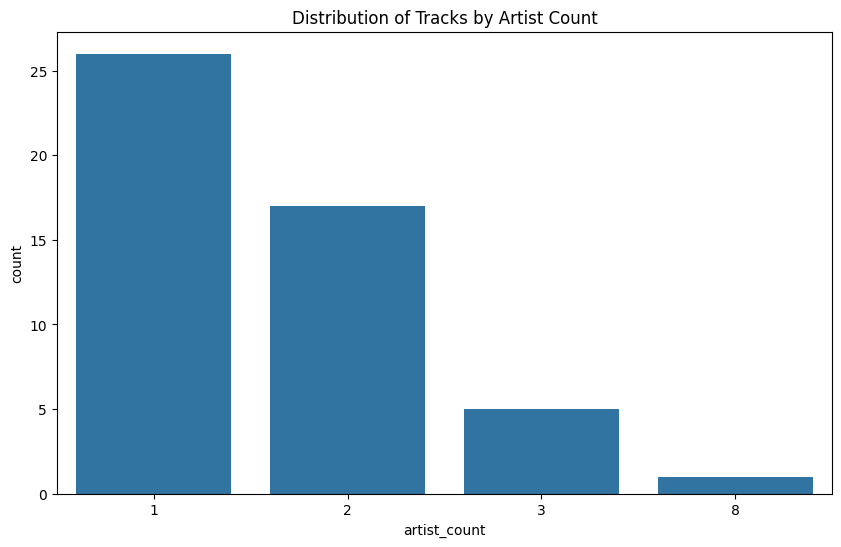

In [55]:
# Assuming you have the dataframes 'tracks' and 'chart_rankings'

# Distribution of Tracks by Artist Count
plt.figure(figsize=(10,6))
sns.countplot(x='artist_count', data=track_name)
plt.title('Distribution of Tracks by Artist Count')
plt.show()


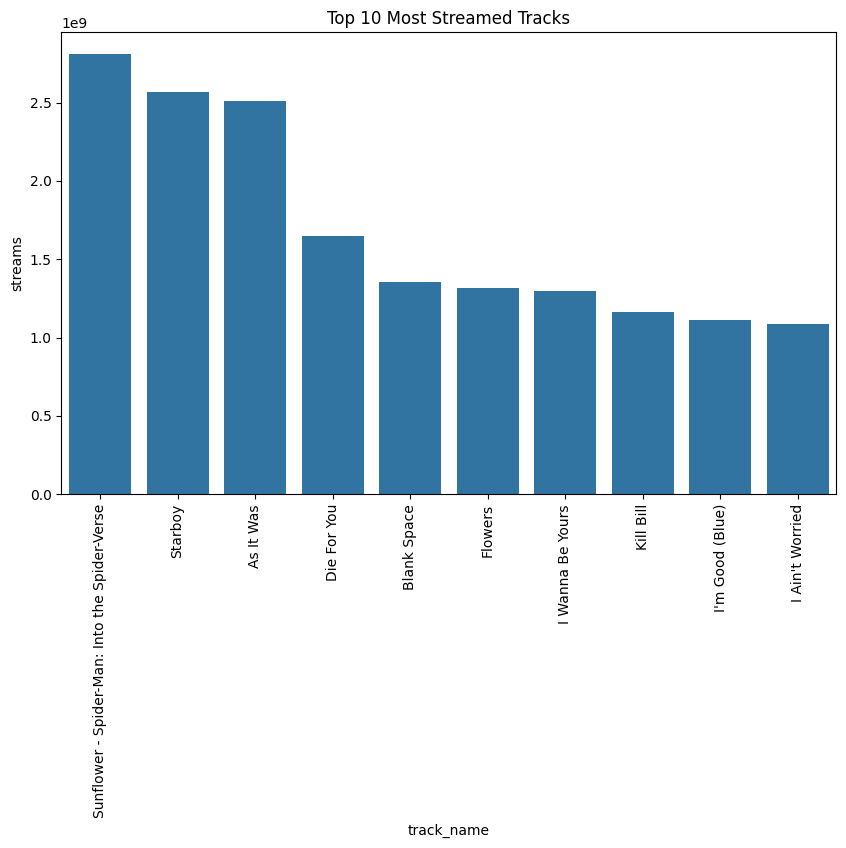

In [59]:
# Top 10 Most Streamed Tracks
top_tracks = track_name.nlargest(10, 'streams')
plt.figure(figsize=(10,6))
sns.barplot(x='track_name', y='streams', data=top_tracks)
plt.title('Top 10 Most Streamed Tracks')
plt.xticks(rotation=90)
plt.show()

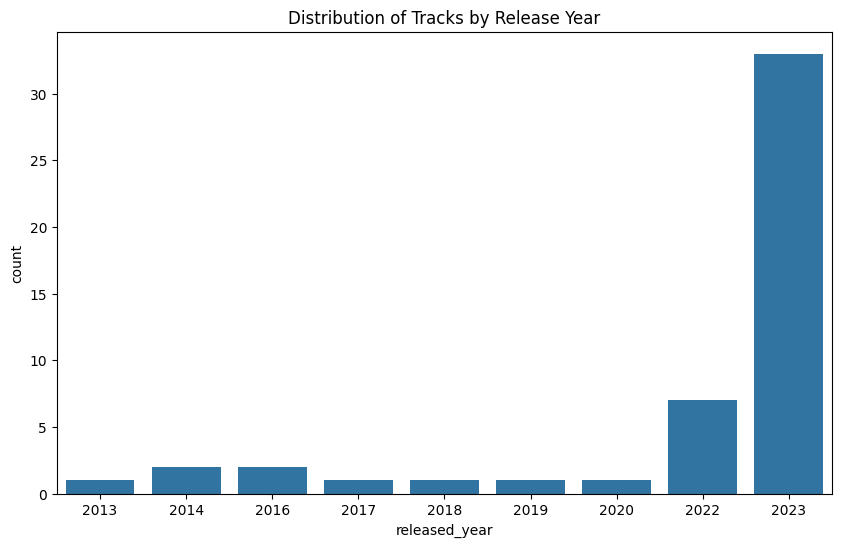

In [61]:
# Distribution of Tracks by Release Year
plt.figure(figsize=(10,6))
sns.countplot(x='released_year', data=track_name)
plt.title('Distribution of Tracks by Release Year')
plt.show()

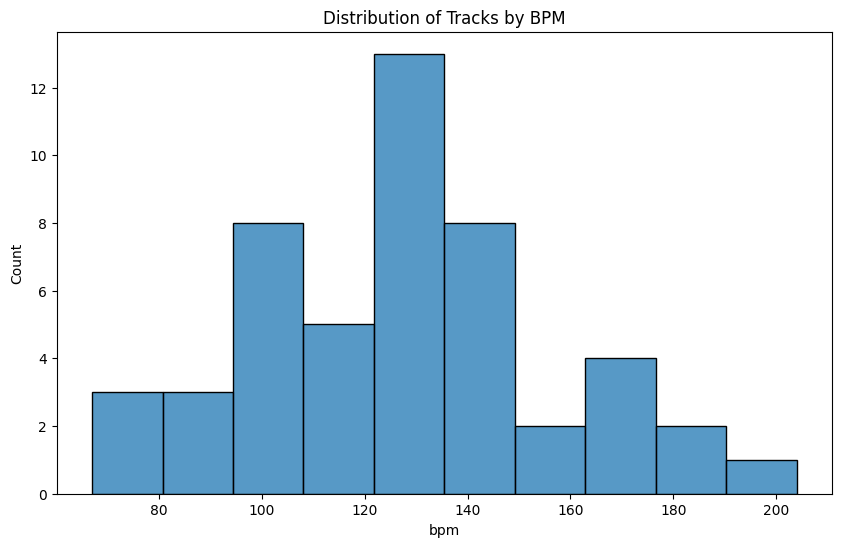

In [63]:
# Distribution of Tracks by BPM
plt.figure(figsize=(10,6))
sns.histplot(x='bpm', data=track_name, bins=10)
plt.title('Distribution of Tracks by BPM')
plt.show()

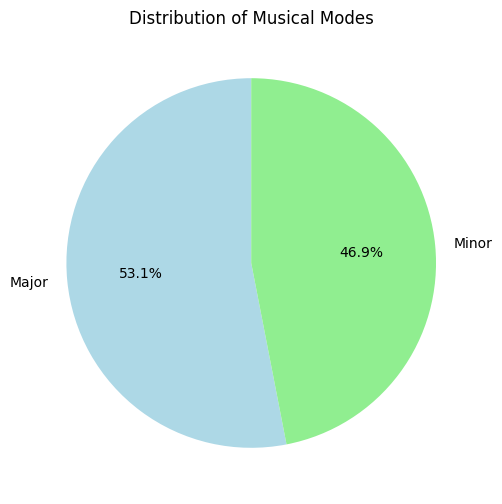

In [28]:
cursor.execute('select * from tracks')
track_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Pie chart for the distribution of musical modes
plt.figure(figsize=(6, 6))
track_df['musical_mode'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=90)
plt.title('Distribution of Musical Modes')
plt.ylabel('')  # Hide the y-label for aesthetic reasons
plt.show()

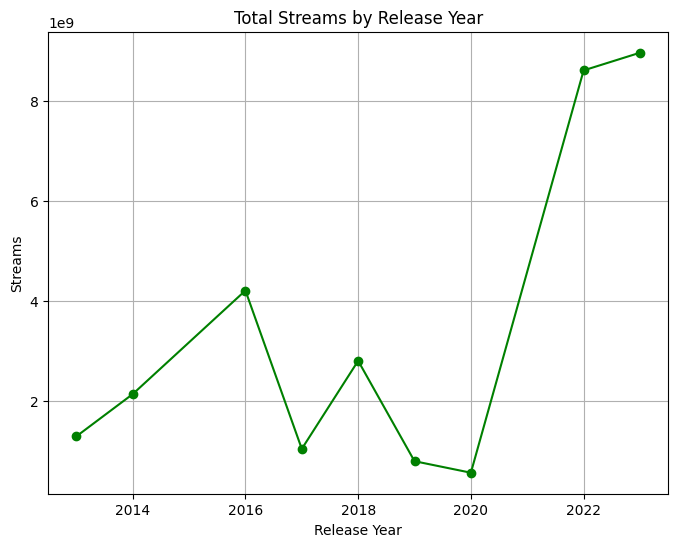

In [29]:
# Line chart for streams over released years
plt.figure(figsize=(8, 6))
track_df.groupby('released_year')['streams'].sum().plot(kind='line', marker='o', color='green')
plt.title('Total Streams by Release Year')
plt.ylabel('Streams')
plt.xlabel('Release Year')
plt.grid(True)
plt.show()

# Conclusion
The analysis of the Spotify dataset reveals significant insights into the listening patterns, track characteristics, and artist performance. By examining track popularity, genre distribution, and streaming trends, we can identify key factors that contribute to the success of a song.
These insights provide a foundation for optimizing music marketing strategies, understanding listener preferences, and predicting future trends in the music industry.



# Recommendations
Enhanced Artist Promotion:

Implement targeted marketing campaigns for artists based on their genre and popularity metrics to maximize exposure. Utilize social media platforms and playlists to reach wider audiences and increase engagement.

Data-Driven Release Strategies:

Develop release strategies that consider optimal timing and seasonal trends identified in the analysis. Launching tracks during peak listening periods can enhance visibility and streaming numbers.

Targeted Listener Engagement:

Create personalized playlists and recommendations based on listener preferences and behavior patterns. Leveraging data analytics can help provide users with tailored content that resonates with their musical tastes.

Regular Data Quality Assessments:

Conduct routine audits of the Spotify dataset to ensure accuracy and consistency of track metadata, artist information, and user engagement metrics. This is crucial for reliable analysis and decision-making.

Collaboration Opportunities:

Encourage collaborations between artists from different genres to tap into diverse fan bases and expand reach. The analysis indicates that collaborative tracks often outperform solo efforts, enhancing overall streaming performance.

Utilize Advanced Visualization Tools:

Leverage data visualization tools to create interactive dashboards for real-time monitoring of track performance and user engagement. This will aid in making informed decisions about marketing strategies and resource allocation.

Ongoing Research and Trend Analysis:

Invest in continuous research to explore the impact of various factors on track performance, including demographic trends and changing listener preferences. This can lead to more effective strategies for promoting new music and artists.

By implementing these recommendations, music producers and marketers can enhance artist visibility, improve listener satisfaction, and foster a more dynamic music environment within the Spotify ecosystem.